# Hierarchical Clustering 

In this assignment, we will implement hierarchical clustering on https://www.kaggle.com/arjunbhasin2013/ccdata. The dataset has information about credit card behaviour for customers and we need to find clusters of similar customers. We will use hierarchical approach for this problem. 

### 1. Importing required libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns

### 2. Reading the dataset 

In [0]:
data = pd.read_csv('CC GENERAL.csv')
# data.info()
# print(data.describe())
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [0]:
data =data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
print(data.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

/home/teddy/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 4. Dendrogram visualization 

We will plot the dendrogram for this dataset to get an idea of an appropriate k for our agglomerative clustering algo later. 

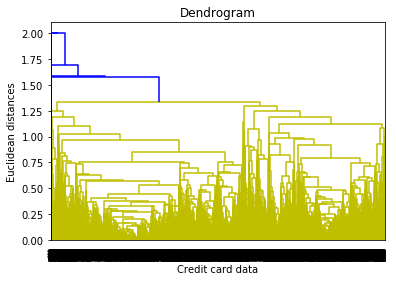

In [0]:
dendrogram = sch.dendrogram(sch.linkage(data, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Credit card data')
plt.ylabel('Euclidean distances')
plt.show()

### 5. Clustering model
Now we apply the agglomerative clustering technique to our dataset. Set the parameters: <br>
1. number of clusters 
2. distance measure 
3. linkage criteria 

In [0]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
y_hc=hc.fit(data)

In [0]:
labels = y_hc.labels_
np.unique(labels, return_counts=True)

(array([0, 1]), array([4685, 4265]))

In [0]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head(2000)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,2.147795e-03,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.005587,0.031720,0.003979,0.001826,0.000000,1.000000,0
1,1.681691e-01,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.032520,0.000000,0.232053,0.080893,0.014034,0.222222,1.000000,0
2,1.310261e-01,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.000000,1.000000,0
3,8.752079e-02,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.008130,0.002793,0.248748,0.000000,0.008210,0.000000,1.000000,0
4,4.294010e-02,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.002793,0.038397,0.013374,0.003204,0.000000,1.000000,0
5,9.503836e-02,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,0.022346,0.058431,0.027603,0.031506,0.000000,1.000000,0
6,3.293894e-02,1.000000,0.144598,0.157076,0.030595,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.178771,0.449082,0.125279,0.002592,1.000000,1.000000,0
7,9.576430e-02,1.000000,0.008895,0.000000,0.019387,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.033520,0.075125,0.013388,0.006963,0.000000,1.000000,0
8,5.329618e-02,1.000000,0.017567,0.016228,0.008889,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,0.013966,0.232053,0.013570,0.004083,0.000000,1.000000,0
9,7.993744e-03,0.545455,0.026134,0.031442,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.008380,0.365609,0.022964,0.001312,0.000000,1.000000,0


We find the means of the clusters we obtained. 

In [0]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1560.475360,0.877175,1002.648079,592.901092,410.047404,978.847885,0.490287,0.202616,0.364275,0.135203,3.249581,14.694621,4492.857892,1732.802180,824.715172,0.153835,11.516941
1,6674.080781,1.000000,1714.498571,0.000000,1714.498571,1008.546231,0.571429,0.000000,0.571429,0.059524,2.285714,34.142857,6457.142857,2169.653661,52620.432990,0.000000,12.000000


### 6. Visualization 

Since our data is multi-dimensional, we will project it onto two axes using PCA for visualizing purpose. 

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf.head(2)

,P1,P2
0,-0.482164,-0.097656
1,-0.608577,-0.019376


In [0]:
data_principal = principalDf.assign(clusters=labels)
data_principal.head()

,P1,P2,clusters
0,-0.482164,-0.097656,1
1,-0.608577,-0.019376,1
2,0.304508,0.920946,0
3,-0.588621,-0.005612,1
4,-0.554354,0.052965,1


Now, we use seaborn to plot the 2-D points where each cluster is coloured differently. 

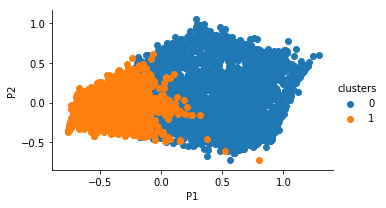

In [0]:
fg = sns.FacetGrid(data=data_principal, hue='clusters', aspect=1.61)
fg.map(plt.scatter, 'P1', 'P2').add_legend()